<a href="https://www.kaggle.com/code/marcelocruzeta/we-will-find-brazilian-amazon-ratanaba?scriptVersionId=246094289" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# The Journey of Analyzing Anomalies in the Amazon Rainforest

## For de checkpoint 2 of Z challenge, fresh files are in version 25 of this Kaggle.

## Introduction
In this saga, we explored the use of LIDAR image data and artificial intelligence techniques to uncover evidence of human intervention in the Amazon rainforest.

## Stages of the Journey

1. **Discovery of Human Interventions**:
   - We identified a location with clear human intervention that could be captured by freely available LIDAR images.

2. **References for Anomalies**:
   - From **The Archeo Blog**, we downloaded references to known anomalies that might be relevant to our analyses.

3. **Extraction of LIDAR Images**:
   - We obtained LIDAR images from the **OpenTopography** site, which provided the necessary basis for analysis.

4. **Preparing the Image for Prompt**:
   - We processed a special image to be used as a basis for generating prompts for OpenAI's **GPT-4.1 Vision**.

5. **Analysis of the Initial Image**:
   - We analyzed the image in the new **GPT-4.1 Vision**, which provided insights regarding the presence of features suggesting human intervention.

6. **Extraction of Satellite Images**:
   - Additionally, we extracted images from the **COPERNICUS/S2_SR_HARMONIZED** satellite using Google Earth Engine (GEE).
   - We adapted and implemented a script by **Justin Braaten - jdbcode**, which we use for cloud removal from the images.

7. **Re-Prompting for Analysis of the New Images**:
   - Using the prompt generated from the previous analysis, we conducted a re-prompt to analyze the processed images from item 6.

8. **Recording the Information**:
   - We saved information from all analyses into a JSON file. In the saved version number 25 of this Kaggle project, all analyzed images were satisfactory in identifying anomalies, which was expected due to the known presence of geoglyphs in the area.

9. **Next Steps**:
   - Our next step will be to utilize the developed system to analyze future image crops from yet unknown areas of the Amazon rainforest. The goal is to find new candidates that may require further field analysis.

## Conclusion
The interaction between geospatial data and artificial intelligence has allowed us to advance our search for human interventions in the Amazon rainforest, paving the way for future discoveries and analyses.

# 1. Introduction

This notebook is part of the research project "OpenAi to Z Challenge", which aims to uncover archaeological sites in the Amazon rainforest, with a particular focus on the investigation of geoglyphs and evidence of human intervention.

To achieve this, we will utilize the Copernicus GLO-30 Digital Elevation Model (DEM) dataset available in GeoTIFF format. Our analysis aims to visualize various aspects of the terrain to identify anomalies that may indicate human activity or historical geoglyphs.

Throughout this notebook, we will employ different visualization techniques, including hillshade, slope mapping, aspect analysis, and color relief mapping, to enhance our understanding of the spatial characteristics of the landscape. We will evaluate which visualization methods provide the clearest insights into the potential archaeological sites.

The following sections will outline our approach and methodology, including data loading, processing, and visualization, ultimately leading to a discussion of the observed results.

#### Dataset Citation:

NASA JPL (2021). <i>NASADEM Merged DEM Global 1 arc second V001</i>.  Distributed by OpenTopography. https://doi.org/10.5069/G93T9FD9. Accessed: 2025-06-06

European Space Agency (2024).  <i>Copernicus Global Digital Elevation Model</i>.  Distributed by OpenTopography.  https://doi.org/10.5069/G9028PQB. Accessed: 2025-06-11
# Updating Our Project to Meet the Next Checkpoints

We’ve been making great progress on our current project, successfully implementing image processing, filtering, and export functions using Google Earth Engine. Throughout this process, we’ve worked diligently to fine-tune our functions, ensuring they are robust and aligned with actual data (such as available bands like `'MSK_CLDPRB'` and `'SCL'`).  

Now, our next goal is to integrate these steps into a comprehensive workflow that fits the upcoming project checkpoints. Here's the plan:

### Next Steps in Our Workflow:

1. **Download Data for Each Site**  
   We will create a loop that processes each site—using their coordinates—and applies our existing filtering functions precisely as developed. This ensures each dataset is processed consistently and efficiently.

2. **Automate Image Processing and Export**  
   For each location, we will:
   - Set the region based on site coordinates.
   - Retrieve the Sentinel-2 collection.
   - Apply our custom filtering functions (masking clouds and shadows).
   - Generate median composite images.
   - Export the images for further analysis.

3. **Leverage the Data in AI Prompts**  
   Once images are ready, we plan to use an AI API **(like GPT-4.1 Vision)** to analyze these images' contents, generate descriptions, identify anomalies, and produce candidate footprints.

### Our Progress:

- **Function Development:**  
  We've successfully developed functions that perform visual filtering with correct band references, using available bands like `'MSK_CLDPRB'` and `'SCL'`.  
- **Data Integration:**  
  We are now prepared to process multiple sites using a combined loop that automates the entire pipeline.

### Moving Forward:

- Adjust the project workflow to run these functions iteratively for all sites.
- Ensure the images are exported correctly, and archives are ready for analysis.
- Incorporate AI prompts to interpret the visual data and generate actionable insights.

**We're on the right path, and these refinements will make our process robust, scalable, and ready to meet the upcoming checkpoints.**  


# 2. Installation

This cell ensures that all required libraries are up-to-date and installs any necessary packages for the project. 

We will:
- Upgrade `pip` to the latest version.
- Install or upgrade the following libraries:
  - `rasterio` for reading and writing raster data (GeoTIFF).
  - `geopandas` for handling geospatial vector data (e.g., shapefiles).
  - `seaborn` for enhanced statistical data visualization.
  - Ensure compatibility by installing a specific version of `rich` required by the `bigframes` library.

Make sure to run this cell only once to set up the environment properly.

In [1]:
# ========================= CELL 1: Package Installations =========================

# Upgrade pip to ensure the latest package management features
!pip install --upgrade pip
# Installs or updates rasterio, a library for reading and writing raster data formats like GeoTIFF
!pip install --upgrade rasterio
# Installs or updates geopandas, a library for working with geospatial dataframes
!pip install --upgrade geopandas
# Installs or updates seaborn, a statistical data visualization library built on top of matplotlib
!pip install --upgrade seaborn
# Installs or updates the Earth Engine API for Python, used to access Google Earth Engine data and tools
!pip install earthengine-api --upgrade

# Optional: Add other installations if needed, e.g.,
# !pip install folium  # For interactive map visualization

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 109.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [rasterio]
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.14.4
    Uninstalling geopandas-0.14.4:
      Successfully uninstalled geopandas-0.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.42.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
  Attempting uninstall: google-api-core
    Foun

# 3. Imports

In this cell, we will import the necessary libraries for our analysis and visualization.

The libraries included are:
- `numpy`: For numerical operations and array manipulations.
- `pandas`: For data manipulation and analysis.
- `rasterio`: For reading and writing raster data (GeoTIFF files).
- `matplotlib.pyplot`: For plotting and visualizing data.
- `geopandas`: For working with geospatial vector data (e.g., shapefiles).
- `seaborn`: For enhanced statistical data visualization.
- `PIL (Pillow)`: For image processing tasks, if needed.
- `os`: For file and directory management tasks.
- `openai`: To interact with OpenAI API (if required).
- `kaggle_secrets`: To securely access secrets (like API keys) in the Kaggle environment.

Ensure that all libraries are correctly installed before running this cell.

In [2]:
# ========================= CELL 2: Imports and Initial Configurations =========================

# Standard library imports
import os  # To perform operating system dependent functionalities, like file management
import json
import ee
import base64
import geemap.core as geemap
import requests
import gdown
import numpy as np  # For numerical computations and array manipulations, essential for data processing
import pandas as pd  # For structured data handling, dataframes, and data analysis
import rasterio  # To read, write, and process GeoTIFF raster data
from rasterio.transform import Affine
from rasterio.transform import xy
import matplotlib
import matplotlib.pyplot as plt  # To create static, animated, and interactive visualizations
import matplotlib.colors as colors
import geopandas as gpd  # Extends pandas for spatial data reading, writing, and analysis
import seaborn as sns  # For statistical data visualization, built on top of matplotlib
from PIL import Image  # Provides image processing capabilities (loading, manipulating images)
from openai import OpenAI  # To interact with the OpenAI API for language model queries
from kaggle_secrets import UserSecretsClient  # To securely access API keys stored in Kaggle Secrets
from scipy.ndimage import gaussian_filter  # For image filtering and smoothing operations
import folium  # To create interactive maps for visualization of spatial data
from tabulate import tabulate
# Optional: set Seaborn style for aesthetic plots
sns.set(style="whitegrid")

In [3]:
# define filepath for an important file
file_path_1 = '/kaggle/input/geotiffs/apiacas_geotiff_hh.tif'

# 4. Define Functions

In this cell, we will define various functions that will be utilized throughout the analysis and visualization of the geospatial data.

The functions to be implemented include:

1. **load_raster**: A function to load GeoTIFF raster files and return the corresponding data for analysis.

2. **visualize_raster**: A function to generate different types of visualizations from raster data, such as hillshade and relief maps, allowing customization through parameters.

3. **analyze_anomalies**: A function designed to identify anomalies in the raster data based on specified criteria, helping to highlight potential archaeological features.

4. **process_image**: A function for performing specific image processing tasks, which may include filters or modifications necessary for further analysis.

5. **export_results**: A function to save the processed results to specified file formats, ensuring results can be easily shared or analyzed further.

6. **descriptive_statistics**: A function to calculate and return descriptive statistics of the data, providing insights into the characteristics of the analyzed terrain.

Defining these functions will enhance the organization of the code and allow for easier reuse of functionality across the notebook.

In [4]:
def load_raster(file_path):

    """
    Load a GeoTIFF raster file and return the data.
    
    Parameters:
    file_path (str): The path to the GeoTIFF file.

    Returns:
    geoTiff_data: The raster data read from the file.
    profile: The metadata profile of the raster.
    """
    try:
        with rasterio.open(file_path) as src:
            geoTiff_data = src.read()  # Read the raster data
            profile = src.profile  # Get the metadata profile
        return geoTiff_data, profile  # Return the loaded data and profile
    except FileNotFoundError:
        print(f"Error: The file at {file_path} was not found.")
        return None, None  # Return None on error
    except rasterio.errors.RasterioError as e:
        print(f"Rasterio error occurred: {e}")
        return None, None  # Return None on error
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        
        return None, None  # Return None on error

def descriptive_statistics(geoTiff_data, profile):
    """
    Calculate and return descriptive statistics of the raster data.
    
    Parameters:
    geoTiff_data: The raster geoTiff_data (3D numpy array).
    profile: The metadata profile of the raster (for geotransform and dimensions).
    
    Returns:
    results: A dictionary containing descriptive statistics including area covered,
             minimum and maximum altitudes, valid data ratio, mean and standard deviation.
    """
    results = {}
    
    # 1. Dimensions
    results['width'] = profile['width']  # Width of the raster in pixels
    results['height'] = profile['height']  # Height of the raster in pixels
    
    # 2. Area Covered - Calculate the total area in square meters
    geotransform = profile['transform']  # Transformation array providing scaling info
    pixel_area = abs(geotransform[0] * geotransform[4])  # Area of a single pixel in square meters
    area_covered = results['width'] * results['height'] * pixel_area  # Total area in square meters
    results['area_covered'] = area_covered  # Store the total area
    
    # 3. Minimum and Maximum Altitudes
    data_2d = geoTiff_data[0]  # Assuming the data is in the first band
    results['altitude_min'] = np.nanmin(data_2d)  # Minimum altitude value, ignoring NaNs
    results['altitude_max'] = np.nanmax(data_2d)  # Maximum altitude value, ignoring NaNs
    
    # 4. Valid Data Statistics
    valid_data_count = np.count_nonzero(~np.isnan(data_2d))  # Count valid (non-null) entries
    total_data_count = data_2d.size  # Total number of pixels in the raster
    results['valid_data_ratio'] = valid_data_count / total_data_count  # Ratio of valid data to total pixels
    
    # 5. Mean and Standard Deviation
    results['mean_altitude'] = np.nanmean(data_2d)  # Mean altitude value, ignoring NaNs
    results['std_dev_altitude'] = np.nanstd(data_2d)  # Standard deviation of altitude values, ignoring NaNs

    return results

def calculate_slope(dtm_data):
    """
    Calculate the slope of the Digital Terrain Model (DTM) using gradients.

    Parameters:
    dtm_data (numpy array): The 2D array of elevation data from the DTM.

    Returns:
    numpy array: A 2D array representing the slope in degrees.
    """
    # Smooth the DTM data to reduce noise
    dtm_filtered = gaussian_filter(dtm_data, sigma=1)  # Apply Gaussian filter for smoothing

    # Calculate gradients (slope)
    dx, dy = np.gradient(dtm_filtered)  # Compute gradients in the x and y directions
    slope = np.arctan(np.sqrt(dx**2 + dy**2))  # Calculate slope in radians
    slope_degrees = np.degrees(slope)  # Convert radians to degrees
    return slope_degrees  # Return the slope in degrees

def crop_circular_region(image, center, radius):
    """
    Crops a circular region from the given image.

    Parameters:
    - image: 2D or 3D array of the original image
    - center: tuple (x_center, y_center) of the circle's center
    - radius: radius of the circular crop

    Returns:
    - the cropped region with the mask applied
    """
    # Get the dimensions of the image
    rows, cols = image.shape[:2]
    y_indices, x_indices = np.ogrid[:rows, :cols]
    
    # Calculate the distance of each pixel from the center
    dist = np.sqrt((x_indices - center[0])**2 + (y_indices - center[1])**2)
    
    # Create the circular mask
    mask = dist <= radius
    
    # Apply the mask to the image
    if image.ndim == 3:
        # For color images with channels
        mask = mask[:, :, np.newaxis]
        cropped_region = np.where(mask, image, np.nan)  # Replace outside with NaN
    else:
        cropped_region = np.where(mask, image, np.nan)
        
    return cropped_region

def save_region(region_array, filename):
    """
    Save the already cropped region to an image file.
    """
    plt.imsave(filename, region_array, cmap='terrain')  # Use colormap padrão que usou

def selecionar_registros(csv_path, klm_list, show_table=False):
    """
    Loads records from a CSV, filters by KLM list and displays the table.
    
    Parameters:
    - csv_path (str): Path of the CSV file.
    - klm_list (list): List of KLM names to filter.
    - show_table (bool): If True, displays the filtered table.
    
    Returns:
    - filtered_df (pd.DataFrame): DataFrame with the filtered records.
    """
    # Leitura do CSV
    df = pd.read_csv(csv_path)

    # Filtra por KLM
    filtered_df = df[df['KLM'].isin(klm_list)].copy()

        # Opcional: mostra a tabela
    if show_table:
        headers = ["KLM", "Site Name", "Latitude", "Longitude"]
        print("List of selected records:")
        print(tabulate(
            filtered_df,
            headers=headers,
            tablefmt='fancy_grid',
            numalign='center',
            stralign='center',
            showindex=False
        ))

    # Retorna o dataframe filtrado
    return filtered_df

# Function to calculate delta in degrees for the desired area in km^2
def calculate_delta_deg(area_km2):
    side_km = area_km2 ** 0.5
    delta_deg = side_km / 111  # Approximate conversion
    return delta_deg
    

def get_s2_sr_cld_col(aoi, start_date, end_date):
    # Coleção harmonizada do Sentinel-2
    s2_sr_col = (ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
        .filterBounds(aoi)
        .filterDate(start_date, end_date)
        .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', CLOUD_FILTER)))
    # Coleção de probabilidade de nuvem
    s2_cloudless_col = (ee.ImageCollection('COPERNICUS/S2_CLOUD_PROBABILITY')
        .filterBounds(aoi)
        .filterDate(start_date, end_date))
    # Join para associar a probabilidade de nuvem
    return ee.ImageCollection(ee.Join.saveFirst('s2cloudless').apply(**{
        'primary': s2_sr_col,
        'secondary': s2_cloudless_col,
        'condition': ee.Filter.equals(**{
            'leftField': 'system:index',
            'rightField': 'system:index'
        })
    }))

def add_cld_mask(img):
    # Obter a banda de probabilidade de nuvem
    cloud_prob = ee.Image(img.get('s2cloudless')).select('probability')
    # Mask de nuvens com limiar
    clouds = cloud_prob.gt(CLD_PRB_THRESH).rename('clouds')
    return img.addBands(clouds)

def add_shadows_mask(img):
    # Bits de classificação na banda 'SCL' indicam sombras, água, etc.
    scl = img.select('SCL')
    not_water = scl.neq(6)
    # Pixels escuros na banda B8 (NIR) como indicativo de sombras
    SR_BAND_SCALE = 1e4
    dark_pixels = img.select('B8').lt(NIR_DRK_THRESH * SR_BAND_SCALE).multiply(not_water).rename('dark_pixels')
    # Direção de projeção de sombras (ajuste para sua região ou solar)
    shadow_azimuth = ee.Number(90).subtract(ee.Number(img.get('MEAN_SOLAR_AZIMUTH_ANGLE')))
    # Projetar sombras de nuvens
    cld_proj = (img.select('clouds')
        .directionalDistanceTransform(shadow_azimuth, CLD_PRJ_DIST * 10)
        .reproject(**{'crs': img.select(0).projection(), 'scale': 20})
        .select('distance')
        .mask()
        .rename('cloud_transform'))
    # Pessoas que são pixels escuros intersectando projeções de sombra
    shadows = cld_proj.multiply(dark_pixels).rename('shadows')
    return img.addBands(ee.Image([dark_pixels, cld_proj, shadows]))

# Para visualizar na interface interativa
def add_ee_layer(self, ee_image, vis_params, name):
    map_id_dict = ee_image.getMapId(vis_params)
    tiles_url = map_id_dict['tile_fetcher'].url_format
    folium.TileLayer(
        tiles=tiles_url,
        attr='Map Data &copy; Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)

def add_cld_shdw_mask(img):
    # Bands adicionais de nuvem e sombra
    img_cloud = add_cld_mask(img)
    img_cloud_shadow = add_shadows_mask(img_cloud)
    # Combinar máscaras de nuvem e sombra (1= nuvem/shadow, 0=no)
    is_cld_shdw = img_cloud_shadow.select('clouds').add(img_cloud_shadow.select('shadows')).gt(0)
    # Refinar máscara com focalMin e focalMax para eliminar pequenas áreas
    is_cld_shdw = (is_cld_shdw.focalMin(2).focalMax(BUFFER / 20)
        .reproject(**{'crs': img.select(0).projection(), 'scale': 20})
        .rename('cloudmask'))
    return img_cloud_shadow.addBands(is_cld_shdw)

# Function to download a topography tile
def download_topo_tile(lat_center, lon_center, area_km2=10, save_dir='/kaggle/working/', filename='tile.tif'):
    delta_deg = calculate_delta_deg(area_km2)
    south = lat_center - delta_deg / 2
    north = lat_center + delta_deg / 2
    west = lon_center - delta_deg / 2
    east = lon_center + delta_deg / 2

    url = (
        'https://portal.opentopography.org/API/globaldem'
        f'?demtype=SRTMGL3'
        f'&south={south}'
        f'&north={north}'
        f'&west={west}'
        f'&east={east}'
        f'&outputFormat=GTiff'
        f'&API_Key={API_Key}'
    )

    response = requests.get(url)
    if response.status_code == 200:
        full_path = os.path.join(save_dir, filename)
        with open(full_path, 'wb') as f:
            f.write(response.content)
        print(f'{filename} saved.')
    else:
        print(f"Error downloading {filename}: {response.status_code}")


# Function to encode an image to Base64
def encode_image(image_path):
    """
    Encodes an image to a Base64 string.

    Parameters:
    - image_path (str): Path to the image file to encode.

    Returns:
    - str: Base64 encoded string of the image.
    """
    try:
        with open(image_path, "rb") as image_file:
            return base64.b64encode(image_file.read()).decode("utf-8")
    except Exception as e:
        print(f"Error encoding image '{image_path}': {e}")
        return None
        
# Step 1: Select TIFFs from a directory
def get_tiff_files(directory):
    """Retrieve a list of TIFF files from the given directory."""
    return [os.path.join(directory, f) for f in os.listdir(directory) if f.lower().endswith('.tif')]

# Step 2: Analyze TIFF and log basic data
def analyze_tiff(tiff_path):
    """Extract geographic information from the TIFF file."""
    with rasterio.open(tiff_path) as src:
        bounds = src.bounds
        altitude = src.read(1).mean()  # Average altitude from the first band
        lat = (bounds.top + bounds.bottom) / 2
        lon = (bounds.left + bounds.right) / 2

    return {
        'file_name': os.path.basename(tiff_path),
        'latitude': lat,
        'longitude': lon,
        'altitude': altitude,
    }

# Step 3: Convert TIFF to PNG
def convert_tif_to_png(tif_path, png_path):
    """Convert a TIFF file to PNG format."""
    with rasterio.open(tif_path) as src:
        data = src.read(1)  # Read the first band
        data = (data - data.min()) / (data.max() - data.min()) * 255  # Normalize
        data = data.astype('uint8')

        with rasterio.open(
            png_path,
            'w',
            driver='PNG',
            height=data.shape[0],
            width=data.shape[1],
            count=1,
            dtype='uint8'
        ) as dst:
            dst.write(data, 1)

def analyze_image(client, image_path):
    """Send the PNG image to OpenAI for analysis."""
    base64_image = encode_image(image_path)
    prompt = (
        "You are being shown a COPERNICUS/S2_SR_HARMONIZED satelite image, "
        "look for distinct linear and curving ridges and depressions, "
        "straight and intersecting raised lines or embankments,"
        "possibly indicating man-made structures such as ancient roads,"
        "agricultural terraces, or boundaries,"
        "elongated depressions running roughly parallel to these ridges,"
        "creating a geometric or grid-like pattern"
        "Small mounds and subtle rises in the terrain visible between linear features"
        "If you find some of these characteristics in the analyzed image,"
        "write the word FOUND in capital letters in the first position of your description"
        "Describe surface features in plain English."
    )

# Step 5: Save logs to JSON
def save_logs_to_json(logs, output_file):
    """Save the logs of analysis and metadata to a JSON file."""
    with open(output_file, 'w') as f:
        json.dump(logs, f, indent=4)

# Main processing function
def process_images(input_directory, output_directory, log_file):
    """Process all TIFF files in the input directory, converting them to PNG and analyzing them."""
    tiff_files = get_tiff_files(input_directory)
    logs = []

    # Instantiate the OpenAI client
    api_key = load_secret('Z_Challenge_Key')  # Load your API key
    client = OpenAI(api_key=api_key)

    for tif_file in tiff_files:
        # Analyze TIFF
        metadata = analyze_tiff(tif_file)
        
        # Convert to PNG
        png_file = os.path.join(output_directory, f"{os.path.splitext(os.path.basename(tif_file))[0]}.png")
        convert_tif_to_png(tif_file, png_file)
        
        # Analyze PNG
        analysis_result = analyze_image(client, png_file)
        
        # Combine logs
        log_entry = {
            'metadata': metadata,
            'analysis': analysis_result
        }
        logs.append(log_entry)

    # Save all logs to JSON
    save_logs_to_json(logs, log_file)

# Function to retrieve and download tiles based on list of names
def download_multiple_tiles(klm_list, df, area_km2=10, save_dir='/kaggle/working/SRTMGL3/'):
    for klm_name in klm_list:
        record = df[df['KLM'] == klm_name]
        if record.empty:
            print(f"Record not found for KLM: {klm_name}")
            continue
        lat = float(record.iloc[0]['lat'])
        lon = float(record.iloc[0]['lon'])
        filename = klm_name + ".tif"
        download_topo_tile(lat, lon, area_km2, save_dir, filename)
        print(f"Download completed for {klm_name}")

# Função para formatar valores numéricos: floats e tuples de floats
def format_value(val):
    if isinstance(val, float):
        return f"{val:.4f}"
    elif isinstance(val, tuple):
        return "(" + ", ".join(f"{v:.4f}" for v in val) + ")"
    else:
        return val

# Aqui uma função que faz toda a rotina para um registro
def processar_registro(lon, lat, nome, buffer_km=2):
    # Define a região de interesse
    aoi = ee.Geometry.Point(lon, lat)
    region = aoi.buffer(buffer_km*1000).getInfo()['coordinates']
    
    # Busca coleção
    col = get_s2_sr_cld_col(aoi, START_DATE, END_DATE)
    # Aplica as máscaras
    col_masked = col.map(add_cld_shdw_mask)
    # Gera a mediana
    median_img = col_masked.median()
    # Visualização (não obrigatório na rotina, mas se desejar pode exibir)
    # imagem_visualizada = median_img.visualize(**{'bands': ['B4', 'B3', 'B2'], 'min':0, 'max':3000, 'gamma':1.1})

    # Exporta usando sua lógica
    imagem_visualizada = median_img.visualize(**{'bands': ['B4', 'B3', 'B2'], 'min':0, 'max':3000, 'gamma':1.1})

    # Configura a tarefa
    task = ee.batch.Export.image.toDrive(
        image=imagem_visualizada,
        description='Export_'+nome,
        folder='GEEE',
        fileNamePrefix=nome,
        region=region,
        scale=10,
        maxPixels=1e10
    )
    # Inicia a exportação
    task.start()
    print(f'Exportando {nome}...')

def load_secret(secret_label):
    """Load secret from Kaggle."""
    try:
        return UserSecretsClient().get_secret(secret_label)
    except Exception as e:
        print("Error loading secret from Kaggle:", e)
        return None


## First experience with the OpenTophografy website
Our first interaction with the OpenTopography website was an exciting experience.
We found the interface to be highly interactive.
Those who have worked with Google Earth Pro should have no difficulty interacting with the interface.
We were already familiar with the area with strange geometric shapes, due to a flight we made over the region a few years ago. We noticed that there was something strange about the slope of that region. The polygon shapes stood out above the forest and did not seem to be due to any natural earth movement. So we searched for that specific image, which is now the subject of the beginning of our study.

In [5]:
# Cell: Processing - Test load_raster function
# Call the load_raster function to load the data
geoTiff_data_1, profile = load_raster(file_path_1)

## First experience with LIDAR files

In order to display and work with georeferenced images, it is necessary to know certain data contained in the image file.
The file itself contains more information than just what makes up the image. In the case of a LIDAR (*) image, there is more information that needs to be analyzed. The file is called GeoTIFF and contains information such as elevation, coordinates...

(*) LiDAR is an acronym for Light Detection and Ranging. In LiDAR, laser light is sent from a source (transmitter) and reflected from objects in the scene. The reflected light is detected by the system receiver and the time of flight (TOF) is used to develop a distance map of the objects in the scene.

In [6]:
# Check if the data was loaded successfully
if geoTiff_data_1 is not None:
    print("Dataset Citation: European Space Agency (2024).  <i>Copernicus Global Digital Elevation Model</i>.  Distributed by OpenTopography.  https://doi.org/10.5069/G9028PQB. Accessed: 2025-06-11")
    print("Data loaded successfully!")
    print(f"Data shape: {geoTiff_data_1.shape}")  # Print the shape of the loaded data
    print(f"Profile: {profile}")  # Print the metadata profile
    print(f"Number of Bands: {profile['count']}")  # Print the number of bands

    # Calculate and print statistics for each band
    for band_index in range(profile['count']):
        band_data = geoTiff_data_1[band_index]
        print(f"Statistics for Band {band_index + 1}:")
        print(f"    Min: {band_data.min()}")
        print(f"    Max: {band_data.max()}")
        print(f"    Mean: {band_data.mean()}")
else:
    print("Failed to load data.")

Dataset Citation: European Space Agency (2024).  <i>Copernicus Global Digital Elevation Model</i>.  Distributed by OpenTopography.  https://doi.org/10.5069/G9028PQB. Accessed: 2025-06-11
Data loaded successfully!
Data shape: (1, 705, 455)
Profile: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 455, 'height': 705, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.0002777777777777778, 0.0, -57.94819445555555,
       0.0, -0.0002777777777777778, -8.071527766666676), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}
Number of Bands: 1
Statistics for Band 1:
    Min: 109.03036499023438
    Max: 291.5968322753906
    Mean: 17

#  Slope Calculation

To calculate the slope of the terrain, we utilized the elevation data extracted from the Digital Terrain Model (DTM). The `np.gradient()` function was applied to the smoothed elevation data to compute the variations in the x and y directions. The slope was then obtained using the formula:

\[
\text{slope} = \arctan\left(\sqrt{\left(\frac{\partial z}{\partial x}\right)^2 + \left(\frac{\partial z}{\partial y}\right)^2}\right)
\]

where \( z \) represents elevation. The slope was converted from radians to degrees for easier interpretation.

### Slope Visualization

The resulting slope was visualized using a plot, providing a clear representation of the terrain variations, which is essential for identifying geomorphological features and potential archaeological sites.

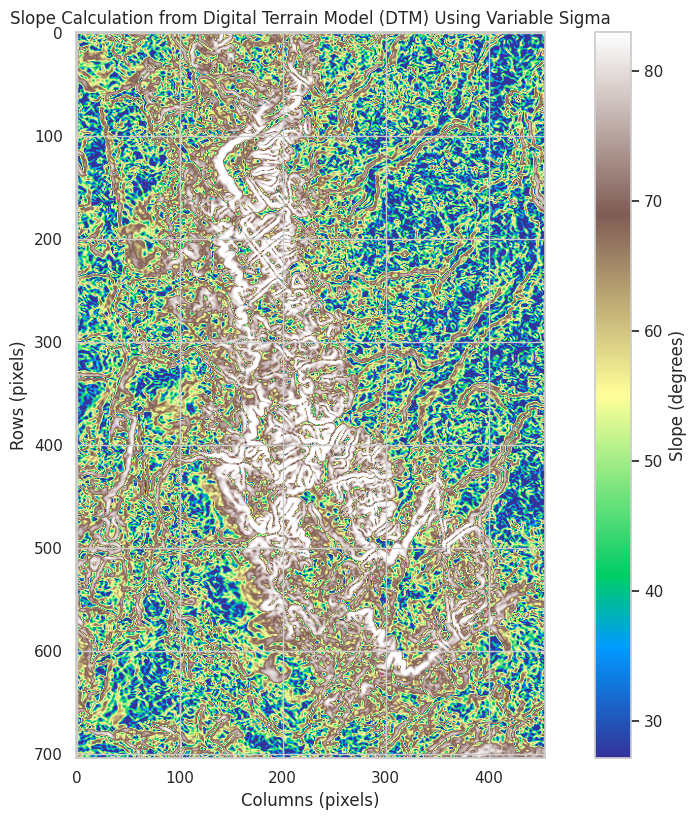

In [7]:
# Cell: Slope Calculation and Plot with Sigma Control
sigma_value = 1.5  # Adjustable sigma value

dtm_data = geoTiff_data_1[0]  # Extract elevation data from first band
slope_data = calculate_slope(dtm_data)  # Your slope calculation function

mean_val = np.nanmean(slope_data)
std_val = np.nanstd(slope_data)

# Ensure vmin is not negative since slope values are physically non-negative
vmin = max(0, mean_val - sigma_value * std_val)
vmax = mean_val + sigma_value * std_val

# Guarantee vmax > vmin, adjust if necessary (edge case)
if vmax <= vmin:
    vmax = vmin + 1e-6  # minimal positive delta

masked_slope = np.ma.masked_invalid(slope_data)
norm = colors.Normalize(vmin=vmin, vmax=vmax)

plt.figure(figsize=(10, 8))
plt.imshow(masked_slope, cmap='terrain', norm=norm)
plt.colorbar(label='Slope (degrees)')
plt.title('Slope Calculation from Digital Terrain Model (DTM) Using Variable Sigma')
plt.xlabel('Columns (pixels)')
plt.ylabel('Rows (pixels)')
plt.tight_layout(pad=0)
plt.show()

#  Extracted Area

The extracted area was selected based on its known characteristics, which match the patterns of anomalies we aim to identify. This specific region was chosen due to the certainty that it contains clear examples of human-induced alterations.

### Selection Criteria

- **Coordinates**: The center of the extracted area is defined by the pixel coordinates. These coordinates correspond to a location within the raster image that is known to exhibit distinct features indicative of anomalies.
- **Radius**: A radius of 20 pixels was used to delineate the area for extraction. This size was chosen to encompass sufficient context around the center point, ensuring that the analysis captures the relevant surrounding details.
  
### Purpose of Extraction

By focusing on this specific area, we can effectively analyze the presence and characteristics of anomalies. The visualization of both the original and processed images allows for a comprehensive comparison, demonstrating how preprocessing techniques can enhance the visibility of relevant patterns. This approach is essential for validating our detection algorithms and improving our understanding of anomalous behaviors in geospatial data.

## You may notice a red warning above the image.

### What is this?

An image file is a matrix of data. A LIDAR image has different data than an optical image, this warning means that some matrix data that was expected in one was not found. Nothing that prevents you from viewing and working with the image.

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


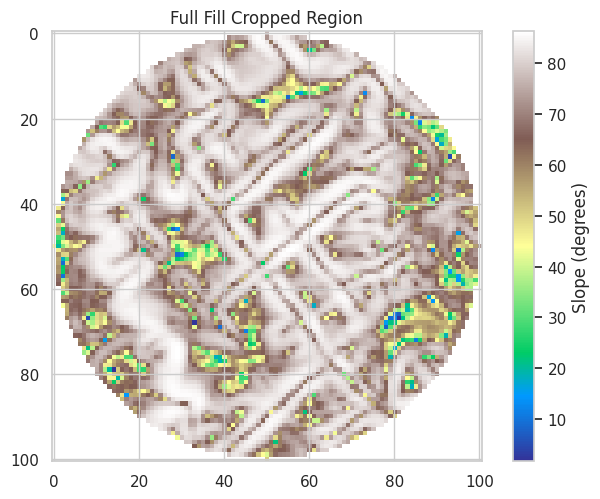

In [8]:
# Configurable parameters
x_center = 180
y_center = 210
radius = 50

# Compute the circular cropped region (assuming your function is defined)
cropped_region = crop_circular_region(slope_data, (x_center, y_center), radius)

# Create mask for valid (non-NaN) values
if cropped_region.ndim == 3:
    mask_valid = ~np.isnan(cropped_region).all(axis=2)
else:
    mask_valid = ~np.isnan(cropped_region)
rows_non_nan, cols_non_nan = np.where(mask_valid)

x_min, x_max = cols_non_nan.min(), cols_non_nan.max()
y_min, y_max = rows_non_nan.min(), rows_non_nan.max()

# Crop the image according to bounds
cropped_box = cropped_region[y_min:y_max+1, x_min:x_max+1]

# Replace infinities with NaN for safety
cropped_box = np.where(np.isfinite(cropped_box), cropped_box, np.nan)

# Mask invalid (NaN) values
masked_cropped_box = np.ma.masked_invalid(cropped_box)

# Obtain a copy of the 'terrain' colormap using the new matplotlib API
cmap = matplotlib.colormaps['terrain'].copy()
cmap.set_bad(color='white')  # Set color for masked (NaN) values

# Define color scaling limits ignoring NaNs
vmin = np.nanmin(cropped_box)
vmax = np.nanmax(cropped_box)

# (Optional) If slope should be non-negative, enforce vmin >= 0 here:
vmin = max(0, vmin)

# Plot the masked cropped region
plt.imshow(masked_cropped_box, cmap=cmap, interpolation='none', vmin=vmin, vmax=vmax)
plt.title('Full Fill Cropped Region')
plt.colorbar(label='Slope (degrees)')
plt.tight_layout(pad=0)
plt.show()

## More data analysis, now of the cropped image

In [9]:
# Assume que você já carregou o raster e tem as funções carregadas e disponíveis

# Define your crop indices (modify as needed)
y_start, y_end = 200, 300  # rows
x_start, x_end = 400, 500  # columns

# Load raster data and profile
geoTiff_data, profile = load_raster(file_path_1)

# Extract 2D array
data_2d = geoTiff_data[0]

# Calculate geo-coordinates of the recorte corners
top_left_x, top_left_y = xy(profile['transform'], y_start, x_start)
bottom_right_x, bottom_right_y = xy(profile['transform'], y_end, x_end)

# Compute size of the recorte
recorte_width = x_end - x_start + 1
recorte_height = y_end - y_start + 1

# Create affine transform for the recorte
new_affine = Affine.translation(top_left_x, top_left_y) * Affine.scale(
    profile['transform'][0], profile['transform'][4]
)

# Build new profile for the recorte
new_profile = profile.copy()
new_profile['width'] = recorte_width
new_profile['height'] = recorte_height
new_profile['transform'] = new_affine

# Extract recorte data from original array
recorte_data = data_2d[y_start:y_end+1, x_start:x_end+1]

# Calculate center coordinates of the recorte
center_x, center_y = xy(new_profile['transform'], recorte_height/2, recorte_width/2)

# Run descriptive_statistics
stats = descriptive_statistics(recorte_data, new_profile)

# Prepare the info table
summary_df = pd.DataFrame({
    'Property': [
        'Longitude (center)',
        'Latitude (center)',
        'Bounds',
        'Resolution',
        'CRS',
        'Transform'
    ],
    'Value': [
        center_x,
        center_y,
        (top_left_x, bottom_right_y, bottom_right_x, top_left_y),
        (profile['transform'][0], profile['transform'][4]),  # pixel size in x and y
        profile['crs'],
        profile['transform']
    ],
    'Comments': [
        'Recorte center longitude',
        'Recorte center latitude',
        'Extent of the recorte in geo-coordinates',
        'Spatial resolution (pixel size in x and y)',
        'Coordinate reference system (CRS)',
        'Affine transformation matrix'
    ]
})

# Aplicar a formatação na DataFrame toda
summary_df['Value'] = summary_df['Value'].apply(format_value)

# Imprimir o resultado formatado
print("Recorte Statistics Summary:")
print(summary_df)

# Além disso, exibir estatísticas detalhadas
print("\nDetailed Statistics:")
for key, value in stats.items():
    print(f"{key}: {value}")

Recorte Statistics Summary:
             Property                                              Value  \
0  Longitude (center)                                           -57.8228   
1   Latitude (center)                                            -8.1414   
2              Bounds             (-57.8369, -8.1550, -57.8092, -8.1272)   
3          Resolution                                  (0.0003, -0.0003)   
4                 CRS                             (proj, datum, no_defs)   
5           Transform  (0.0003, 0.0000, -57.9482, 0.0000, -0.0003, -8...   

                                     Comments  
0                    Recorte center longitude  
1                     Recorte center latitude  
2    Extent of the recorte in geo-coordinates  
3  Spatial resolution (pixel size in x and y)  
4           Coordinate reference system (CRS)  
5                Affine transformation matrix  

Detailed Statistics:
width: 101
height: 101
area_covered: 0.0007871141975308642
altitude_min: 129.5766

In [10]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(profile)

{   'blockxsize': 256,
    'blockysize': 256,
    'compress': 'lzw',
    'count': 1,
    'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
    'driver': 'GTiff',
    'dtype': 'float32',
    'height': 705,
    'interleave': 'band',
    'nodata': None,
    'tiled': True,
    'transform': Affine(0.0002777777777777778, 0.0, -57.94819445555555,
       0.0, -0.0002777777777777778, -8.071527766666676),
    'width': 455}


### Finally, we save the files in the output folder.

### Note that we have a warning similar to the previous one.

In [11]:
# Cell: Save file to working 
plt.imsave('slope.png', slope_data, cmap='terrain')
# Optional: confirmation message
print("Image saved as 'slope.png' in the current working directory.")
masked_data = np.ma.masked_invalid(cropped_box)
# Save the masked array as PNG, avoiding warnings
plt.imsave('slope_c.png', masked_data, cmap='terrain')
print("Image saved as 'slope_c.png'")

Image saved as 'slope.png' in the current working directory.
Image saved as 'slope_c.png'


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


# Image Analysis Submission to OpenAI Vision

This document outlines our successful endeavor to submit an image for analysis using the OpenAI model. The process involved several key steps, all of which contributed to obtaining insights from the image.

## Objective

The primary goal was to analyze a specific image leveraging OpenAI's advanced model capabilities. By submitting this image, we aimed to extract valuable information regarding surface features and anomalies, especially in the context of geospatial data.

## Steps Followed

1. **Image Selection**:
   - Chose an appropriate image derived from LIDAR elevation data to be analyzed.
   - Ensured the image captured relevant surface features such as terrain anomalies.

2. **API Setup**:
   - Configured the environment to access the OpenAI API, including obtaining the necessary API keys.
   - Used `kaggle_secrets` to securely handle the API keys within the Kaggle environment.

3. **Image Encoding**:
   - Converted the image to a Base64 format suitable for transmission across the API.
   - Ensured the encoded image could be correctly interpreted by the AI model.

4. **Prompt Definition**:
   - Crafted a clear and comprehensive prompt to guide the AI model in understanding the context of the image.
   - Example prompt: "You are being shown a slope image derived from LIDAR elevation data, which reveals terrain features. Describe surface features in plain English."

5. **API Submission**:
   - Submitted the encoded image along with the prompt to the OpenAI model using the API.
   - Handled any potential errors during submission to ensure smooth operations.

6. **Results Display**:
   - Retrieved and printed the model's response clearly, showcasing the insights derived from the analysis.
   - Included relevant details about the model used and the dataset involved for reference.

## Conclusion

This innovative approach allowed us to harness the power of AI to analyze complex geospatial data effectively. The insights obtained from the model can significantly enhance our understanding of the terrain features within the submitted image.

### Future Work

- Explore the analysis of additional images to identify patterns or significant anomalies in various terrains.
- Refine prompts and image selection to improve the quality of insights generated by the model.

## Acknowledgments

Special thanks to the OpenAI team for providing such powerful tools for image analysis, which facilitate deeper understanding and exploration of data.


In [12]:
# Retrieve user secrets for OpenAI API
user_secrets = UserSecretsClient()
openaikey = user_secrets.get_secret("Z_Challenge_Key")

# Initialize OpenAI client
client = OpenAI(api_key=openaikey)

# Path to your image
image_path = "/kaggle/input/z-challenge-files/slope_c.png"

# Get the Base64 string of the image
base64_image = encode_image(image_path)

# Create a response using the OpenAI client
response = client.responses.create(
    model="gpt-4.1",
    input=[
        {
            "role": "user",
            "content": [
                {
                    "type": "input_text",
                    "text": "You are being shown a slope image derived from LIDAR elevation data, "
                             "it reveals terrain features such as raised mounds, geometric depressions, "
                             "terracing, or other patterns that may not be visible in standard imagery. "
                             "Describe surface features in plain English."
                },
                {
                    "type": "input_image",
                    "image_url": f"data:image/jpeg;base64,{base64_image}",
                },
            ],
        }
    ],
)

# Define the dataset ID
dataset_id = 'marcelocruzeta/z-challenge-files'  # Replace with your actual dataset ID

# Print dataset ID and model version in a formatted way
print("\n--- Summary of Results ---")
print(f"Dataset ID: {dataset_id}")
print(f"Model Version: {response.model}\n")  # Accessing the model version directly from response

# Print output text with a clear label
print("Generated Output Text:")
print("-------------------------")
print(response.output_text)  # Output the main text response


--- Summary of Results ---
Dataset ID: marcelocruzeta/z-challenge-files
Model Version: gpt-4.1-2025-04-14

Generated Output Text:
-------------------------
The image shows a landscape with a series of raised, linear features that crisscross the area in both diagonal and perpendicular directions. These lines appear as ridges or embankments, possibly forming a grid or network pattern across the surface. In between these raised lines, there are lower, flatter sections which may represent shallow depressions or level ground. There are also some smaller, irregularly shaped mounds and gentle undulations scattered throughout the terrain. The overall effect is a pattern of intersecting lines and patches, indicating significant modification or structuring of the surface, which could be due to natural processes, ancient agricultural activity, or other human influence.


In [13]:
# Cell: GEE connection
user_secrets = UserSecretsClient()
user_credential = user_secrets.get_gcloud_credential()
user_secrets.set_tensorflow_credential(user_credential)
ee.Authenticate()
ee.Initialize(project='openai-to-z-challenge-461613')
print(ee.String('Hello from the Earth Engine servers!').getInfo())

Hello from the Earth Engine servers!


### Cloud-Free Sentinel-2 Image Visualization with Enhanced Masking

This code snippet processes Sentinel-2 satellite imagery to produce a cloud-free composite image over a defined area of interest (AOI).

- **Area of Interest (AOI):** Defined as a geographic point with longitude -67.123219 and latitude -9.716453.
- **Date Range:** Images between January 1, 2018, and May 31, 2025, are considered.
- **Cloud Masking Parameters:** Thresholds are set to identify and mask clouds and their shadows effectively.
- **Image Collection:** A Sentinel-2 surface reflectance collection is obtained and filtered.
- **Cloud and Shadow Masking:** A custom cloud and shadow mask function (`add_cld_shdw_mask`) is applied to all images in the collection.
- **Composite Image:** The median of the masked images is computed to reduce residual clouds.
- **Visualization:** The resulting cloud-free composite is displayed on an interactive folium map centered on the AOI, showing natural color bands (B4 - red, B3 - green, B2 - blue).

This approach leverages Google Earth Engine's powerful cloud masking capabilities and folium's interactive mapping to create a clean, visually appealing satellite image for further analysis or presentation.

**Code updated to new version - earthengine_api-1.5.20**

In [14]:
# Cell: Show filtered image without clouds
# Parameters and area of interest
AOI = ee.Geometry.Point(-57.898488,  -8.128366)
START_DATE = '2018-01-01'
END_DATE = '2025-05-31'
CLOUD_FILTER = 60
CLD_PRB_THRESH = 50
NIR_DRK_THRESH = 0.15
CLD_PRJ_DIST = 2
BUFFER = 100

# Get the collection
collection = get_s2_sr_cld_col(AOI, START_DATE, END_DATE)

# Add Earth Engine layer method to folium
folium.Map.add_ee_layer = add_ee_layer

# Create the final collection with cloud and shadow mask applied
masked_collection = collection.map(add_cld_shdw_mask)

# Take the median to reduce remaining clouds
median_image = masked_collection.median()

# Create the visual map
center = AOI.centroid().coordinates().getInfo()
m = folium.Map(location=[center[1], center[0]], zoom_start=14)

# Display the final cloud-free image
m.add_ee_layer(median_image,
               {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 3000, 'gamma': 1.1},
               'Sentinel-2 cloud-free image with enhanced mask')
folium.Marker(
    location=[-8.125366, -57.898488],
    popup="Reference Image of Supposed Ratanabá",
    icon=folium.Icon(color="red") 
).add_to(m)

# Show map
m

Loads records from a CSV, filters by a list of KLM, and displays the table.

### Parameters:
- **csv_path** (str): Path to the CSV file.
- **klm_list** (list): List of KLM names to filter.
- **show_table** (bool): If True, displays the filtered table.

### Returns:
- **filtered_df** (pd.DataFrame): DataFrame with the filtered records.

In [15]:
# Select the database and records to be used in the process
csv_path='/kaggle/input/archaeological-geodesy/minus5toMinus13.csv'
klm_list=['acrq58', 'acds2', 'acrs35', 'acrp11', 'acrg44']
#klm_list=['acrq58']

to_folium = selecionar_registros(csv_path, klm_list, show_table=True)

# Compute the map center ignoring masked/invalid lat/lon
valid_lat = to_folium['lat'].data if hasattr(to_folium['lat'], 'data') else to_folium['lat']
valid_lon = to_folium['lon'].data if hasattr(to_folium['lon'], 'data') else to_folium['lon']

# Filter out masked/NaN values
valid_lat = valid_lat[~np.ma.getmaskarray(to_folium['lat'])]
valid_lon = valid_lon[~np.ma.getmaskarray(to_folium['lon'])]

center_lat = np.mean(valid_lat)
center_lon = np.mean(valid_lon)

# Create folium Map centered on average coordinates
m = folium.Map(location=['-8.81', '-62.34'], zoom_start=6)

# Iterate through rows and add markers for valid points
for idx, row in to_folium.iterrows():
    # Skip rows with masked lat or lon
    if np.ma.is_masked(row['lat']) or np.ma.is_masked(row['lon']):
        continue

    popup_text = (f"KLM: {row.get('KLM', 'N/A')}<br>"
                  f"Site Name: {row.get('Site Name', 'N/A')}<br>"
                  f"Latitude: {row['lat']:.5f}<br>"
                  f"Longitude: {row['lon']:.5f}")

    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=folium.Popup(popup_text, max_width=300),
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

folium.Marker(
    location=[-8.128366, -57.898488],
    popup="Reference Image of Ratanabá",
    icon=folium.Icon(color="red") 
).add_to(m)

# Display the map
m

List of selected records:
╒════════╤══════════════════════════╤════════════╤═════════════╕
│  KLM   │        Site Name         │  Latitude  │  Longitude  │
╞════════╪══════════════════════════╪════════════╪═════════════╡
│ acrg44 │ Acre Geoglyph 150 x 111m │  -9.66152  │  -67.2353   │
├────────┼──────────────────────────┼────────────┼─────────────┤
│ acrp11 │ Acre Parallelogram 177m  │  -9.71378  │  -67.1203   │
├────────┼──────────────────────────┼────────────┼─────────────┤
│ acrs35 │     Acre Square 158m     │  -9.71645  │  -67.1232   │
├────────┼──────────────────────────┼────────────┼─────────────┤
│ acds2  │ Acre Double Square 175m  │  -9.75805  │  -67.1945   │
├────────┼──────────────────────────┼────────────┼─────────────┤
│ acrq58 │   Acre Quadrangle 114m   │  -9.75812  │  -67.1945   │
╘════════╧══════════════════════════╧════════════╧═════════════╛


# 5. Topography Tile Downloader using OpenTopography API

This script retrieves topography tiles based on KLM identifiers found in a CSV file. It uses the OpenTopography API to download elevation data and displays selected records in a formatted table.

## Dependencies

The script requires the following Python libraries:
- `os`
- `requests`
- `kaggle_secrets`
- `pandas`
- `tabulate`

You can install the required libraries using pip if they are not already installed:
```bash
pip install requests pandas tabulate

In [16]:
# Load your OpenTopography API key (adjust secret label as needed)

# List of records to be extracted from the database 
# klm_list=['acrq58', 'acds2', 'acrs35', 'acrp11', 'acrg44']
# klm_list=['acrq58']

API_Key = load_secret('OpenTopography')  # Replace with your secret label
if API_Key is None:
    raise ValueError("API key for OpenTopography not loaded.")

# Select the database and records to be used in the process
csv_path='/kaggle/input/archaeological-geodesy/minus5toMinus13.csv'

df = selecionar_registros(csv_path, klm_list, show_table=True)


# Execute the process
folder_path = "/kaggle/working/SRTMGL3"
os.makedirs(folder_path, exist_ok=True)

"""
The line below has been commented out to avoid unnecessary 
use of the OpenTopography system. 
The free service serves thousands of users. 
The fewer unnecessary requests the better.
"""

# download_multiple_tiles(klm_list, df, area_km2=10, save_dir='/kaggle/working/SRTMGL3')

List of selected records:
╒════════╤══════════════════════════╤════════════╤═════════════╕
│  KLM   │        Site Name         │  Latitude  │  Longitude  │
╞════════╪══════════════════════════╪════════════╪═════════════╡
│ acrg44 │ Acre Geoglyph 150 x 111m │  -9.66152  │  -67.2353   │
├────────┼──────────────────────────┼────────────┼─────────────┤
│ acrp11 │ Acre Parallelogram 177m  │  -9.71378  │  -67.1203   │
├────────┼──────────────────────────┼────────────┼─────────────┤
│ acrs35 │     Acre Square 158m     │  -9.71645  │  -67.1232   │
├────────┼──────────────────────────┼────────────┼─────────────┤
│ acds2  │ Acre Double Square 175m  │  -9.75805  │  -67.1945   │
├────────┼──────────────────────────┼────────────┼─────────────┤
│ acrq58 │   Acre Quadrangle 114m   │  -9.75812  │  -67.1945   │
╘════════╧══════════════════════════╧════════════╧═════════════╛


'\nThe line below has been commented out to avoid unnecessary \nuse of the OpenTopography system. \nThe free service serves thousands of users. \nThe fewer unnecessary requests the better.\n'

## The following procedures prepare the environment and images for extraction and download from GEE (Google Earth Engine)

## Specifies parameters for the GEE and Drive

In [17]:
# Specifies parameters for the GEE and Drive
input_directory = '/kaggle/input/z-challenge-files/GEEE'
output_directory = '/kaggle/working/GEEE'
log_file = os.path.join(output_directory, 'analysis_logs.json')

# Create output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)


## Processes the images in GEE and saves them to Google Drive.

In [18]:
# Parameters and area of interest
AOI = ee.Geometry.Point(-67.123219, -9.716453)
START_DATE = '2018-01-01'
END_DATE = '2025-05-31'
CLOUD_FILTER = 60
CLD_PRB_THRESH = 50
NIR_DRK_THRESH = 0.15
CLD_PRJ_DIST = 2
BUFFER = 100

# Get the collection
col = get_s2_sr_cld_col(AOI, START_DATE, END_DATE)

# Create the final collection with cloud and shadow mask applied
col_masked = col.map(add_cld_shdw_mask)

# Take the median to reduce remaining clouds
median_img = col_masked.median()

# Select the database and records to be used in the process
csv_path='/kaggle/input/archaeological-geodesy/minus5toMinus13.csv'
# klm_list=['acrq58', 'acds2', 'acrs35', 'acrp11', 'acrg44']
# klm_list=['acrq58']
selected_records = selecionar_registros(csv_path, klm_list, show_table=True)


for idx, row in selected_records.iterrows():
    lon = row['lon']
    lat = row['lat']
    nome = row['KLM']
    # Commented not to process files in the testing phase
    # processar_registro(lon, lat, nome)

List of selected records:
╒════════╤══════════════════════════╤════════════╤═════════════╕
│  KLM   │        Site Name         │  Latitude  │  Longitude  │
╞════════╪══════════════════════════╪════════════╪═════════════╡
│ acrg44 │ Acre Geoglyph 150 x 111m │  -9.66152  │  -67.2353   │
├────────┼──────────────────────────┼────────────┼─────────────┤
│ acrp11 │ Acre Parallelogram 177m  │  -9.71378  │  -67.1203   │
├────────┼──────────────────────────┼────────────┼─────────────┤
│ acrs35 │     Acre Square 158m     │  -9.71645  │  -67.1232   │
├────────┼──────────────────────────┼────────────┼─────────────┤
│ acds2  │ Acre Double Square 175m  │  -9.75805  │  -67.1945   │
├────────┼──────────────────────────┼────────────┼─────────────┤
│ acrq58 │   Acre Quadrangle 114m   │  -9.75812  │  -67.1945   │
╘════════╧══════════════════════════╧════════════╧═════════════╛


## Download files from Google Drive

In [19]:
user_secrets = UserSecretsClient()
secret_value_1 = user_secrets.get_secret("GEEE Folder")

url = f'https://drive.google.com/drive/folders/{secret_value_1}'
# gdown.download_folder(url, quiet=False)

## This next cell calls the process_image function, which submits the images for analysis by GPT Vision and returns a json file with details about the analysis.

In [20]:
input_directory = '/kaggle/input/z-challenge-files/GEEE'
output_directory = '/kaggle/working/GEEE'
log_file = os.path.join(output_directory, 'analysis_logs.json')

# Create output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Process all images
# process_images(input_directory, output_directory, log_file)